In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('iris.csv')

In [91]:
print(df.head())
print(df.sample(5))

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
     sepal.length  sepal.width  petal.length  petal.width     variety
39            5.1          3.4           1.5          0.2      Setosa
57            4.9          2.4           3.3          1.0  Versicolor
73            6.1          2.8           4.7          1.2  Versicolor
46            5.1          3.8           1.6          0.2      Setosa
135           7.7          3.0           6.1          2.3   Virginica


In [92]:
df.columns = ["SL","SW","PL","PW","V"] 

In [93]:
df.isna().sum()


SL    3
SW    3
PL    3
PW    1
V     1
dtype: int64

In [94]:
df["SL"].fillna(df["SL"].mean(),inplace=True)
df["SW"].fillna(df["SW"].mean(),inplace=True)
df['PL'].fillna(df["PL"].mean(),inplace=True)
df["PW"].fillna(df['PW'].mean(),inplace=True)
df["V"].fillna(df["V"].mode()[0],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_26032\3469831660.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SL"].fillna(df["SL"].mean(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_26032\3469831660.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [95]:
df['V'] = df['V'].astype('category')
df['V'] = df['V'].cat.codes

In [96]:
df.head()

,SL,SW,PL,PW,V
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [97]:
from sklearn.preprocessing import MaxAbsScaler

mms = MaxAbsScaler()
df[["SL", "SW", "PL", "PW"]] = mms.fit_transform(df[["SL", "SW", "PL", "PW"]])


In [98]:
df.sample(5)

,SL,SW,PL,PW,V
65,0.848101,0.704545,0.637681,0.56,1
94,0.708861,0.613636,0.608696,0.52,1
16,0.683544,0.886364,0.188406,0.16,0
5,0.683544,0.886364,0.246377,0.16,0
114,0.734177,0.636364,0.739130,0.96,2


In [99]:
def RemoveOutlier(df,var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    high, low = Q3+1.5*IQR, Q1-1.5*IQR

    print("Highest allowed in variable:", var, high)
    print("lowest allowed in variable:", var, low)
    count = df[(df[var] > high) | (df[var] < low)][var].count()
    print('Total outliers in:',var,':',count)
    df = df[((df[var] >= low) & (df[var] <= high))]
    return df


In [100]:
def BuildModel(X, Y):
    from sklearn.model_selection import train_test_split
    xtrain, xtest, ytrain, ytest =train_test_split(X,Y,test_size= 0.25, random_state=0)

    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model = model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(ytest, ypred)
    sns.heatmap(cm, annot=True)
    plt.show()

    from sklearn.metrics import classification_report
    print(classification_report(ytest, ypred))


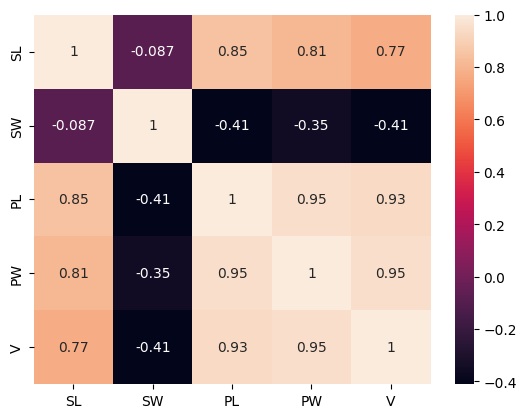

In [101]:
sns.heatmap(df.corr(),annot=True)
plt.show()


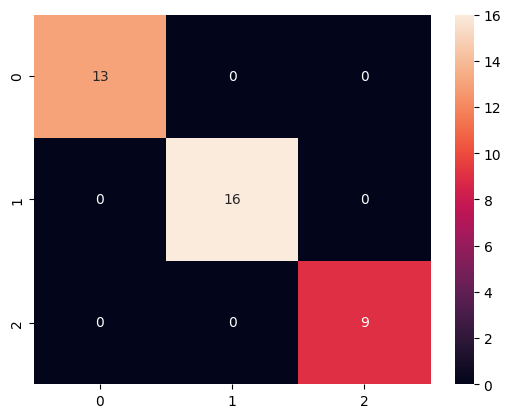

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [102]:
X = df[['SL','SW', 'PL', 'PW']]
Y = df['V']
BuildModel(X, Y)


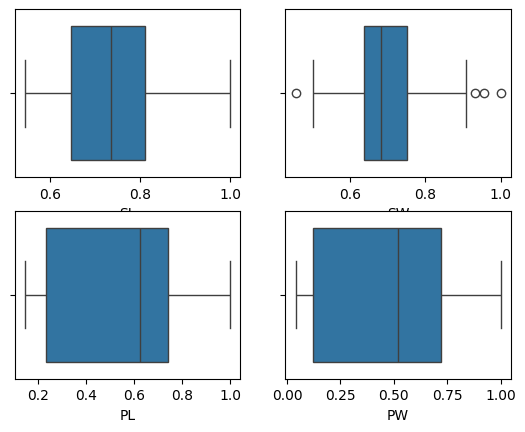

In [103]:
fig, axes = plt.subplots(2,2)
sns.boxplot(data = df, x ='SL', ax=axes[0,0])
sns.boxplot(data = df, x ='SW', ax=axes[0,1])
sns.boxplot(data = df, x ='PL', ax=axes[1,0])
sns.boxplot(data = df, x ='PW', ax=axes[1,1])
plt.show()


In [104]:
df = RemoveOutlier(df, 'SW')


Highest allowed in variable: SW 0.9204545454545454
lowest allowed in variable: SW 0.4659090909090908
Total outliers in: SW : 4


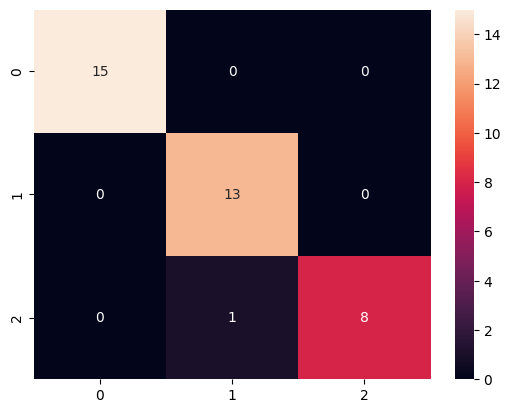

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.96        13
           2       1.00      0.89      0.94         9

    accuracy                           0.97        37
   macro avg       0.98      0.96      0.97        37
weighted avg       0.97      0.97      0.97        37



In [105]:
X = df[['SL','SW', 'PL', 'PW']]
Y = df['V']
BuildModel(X, Y)
